# Example 14.4: Heating with Humidification

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
An air-conditioning system takes in atmospheric air at $40^\circ\mathrm{F}$, $1\ \mathrm{atm}$ with a $40\%$ relative humidity at a rate of $500\ \mathrm{CFM}$ and conditions it to a temperature of $78^\circ\mathrm{F}$ and a relative humidity of $60\%$ by first heating and then injecting saturated water vapor at $1\ \mathrm{atm}$ into the air. Determine:
* (a) The required rate of heat transfer from the coils
* (b) The required mass flow rate of steam

## Solution


### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from thermoJFM.templates.humidair_USCS_F import *

### Given

In [2]:
p_surr = Quantity(1,'atm')

# State 1 - Inlet
T[1] = Quantity(40,'degF')
rel_hum[1] = Quantity(0.4,'')
Vdot[1] = Quantity(500,'cfm')

# Water injection
p['w'] = Quantity(1,'atm')
x['w'] = Quantity(1,'')

# State 3 - Exit
T[3] = Quantity(78,'degF')
rel_hum[3] = Quantity(0.6,'')

display.Summary(locals());

<IPython.core.display.Latex object>

,T,p,x,Vdot,rel_hum
unit,°F,psi,,ft³/s,
1,40,-,-,8.33333,0.4
3,78,-,-,-,0.6
w,-,14.6959,1,-,-


In [3]:
states.fix(1,humidair)
states.fix('w',humidair)
states.fix(3,humidair)
# h_w['inj'] = water.h(T['inj'],x['inj'])
display.Summary(locals());

<IPython.core.display.Latex object>

,T,p,v,h,h_w,s,x,Vdot,T_wb,T_dp,rel_hum,phi,omega
unit,°F,psi,ft³/lb_dry_air,Btu/lb_dry_air,Btu/lb_water,Btu/lb_dry_air/°R,,ft³/s,°F,°F,,,lb_water/lb_dry_air
1,40,-,12.6319,4.16057,-,0.00879739,-,8.33333,31.6493,19.2458,0.4,0.4,0.00207606
3,78,-,13.8189,24.5867,-,0.0487584,-,-,67.9084,63.0045,0.6,0.6,0.0123587
w,-,14.6959,-,-,1150.27,-,1,-,-,-,-,-,-


#### (b) Steam flow rate

In [4]:
# Mass flow rate
mdot_a[1] = Vdot[1]/v[1]
mdot_a[3] = mdot_a[1]

# Water balance
mdot_w['w'] = mdot_a[1]*(omega[3]-omega[1])

display.Calculations(locals(),comments=True);

 Mass flow rate

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Water balance

<IPython.core.display.Latex object>

In [5]:
mdot_a[1].to('lb_dry_air/min')

39.582403153173864 <Unit('pound_dry_air / minute')>

#### (a) Heat input

In [5]:
# 1st Law
Qdot_1_to_2 = mdot_a[1]*(h[3]-h[1]) - mdot_w['w']*h_w['w']
Qdot_1_to_2 = Qdot_1_to_2.to('Btu/min') # hide

display.Calculations(locals(),comments=True);

 1st Law

<IPython.core.display.Latex object>

### Psychrometric Chart

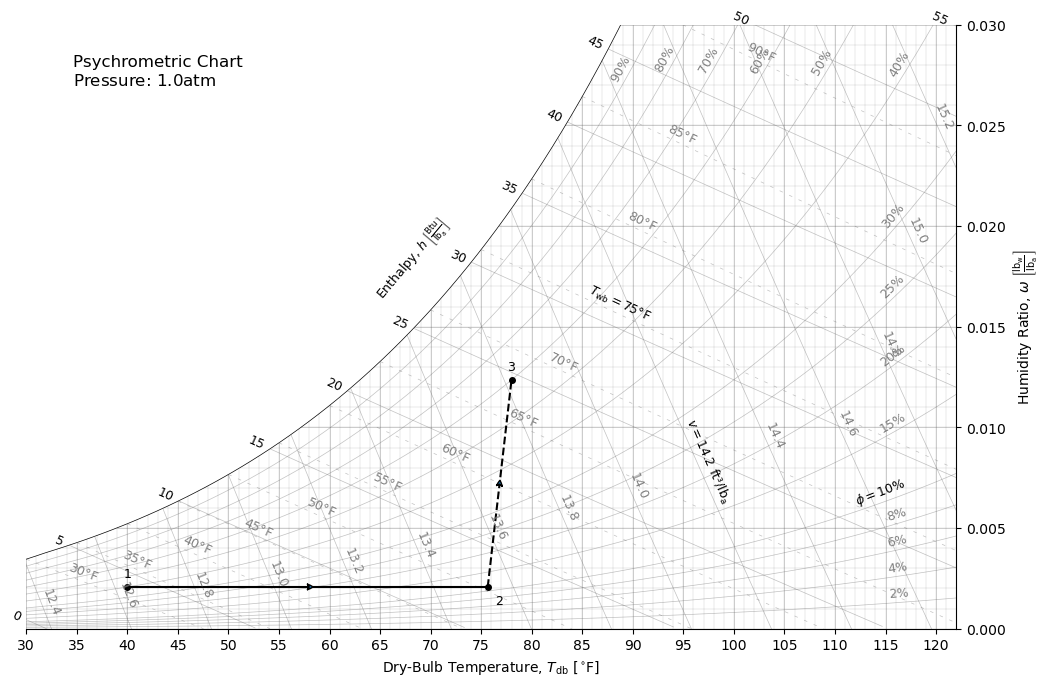

In [6]:
psych = humidair.psychrometric_chart(redraw=False)

# State 2
omega[2] = omega[1]
h[2] = h[1] + Qdot_1_to_2/mdot_a[1]
states.fix(2,humidair)

# Plot States
psych.plot_state(states[1])
psych.plot_state(states[2],label_loc='south east')
psych.plot_state(states[3])

# Plot Processes
psych.plot_process(states[1],states[2],path='simple heating')
psych.plot_process(states[2],states[3]);
